# 30th of August Victory Day


**Nutuk (The Great Speech)** was a speech delivered by Mustafa Kemal Atatürk from 15 to 20 October 1927, at the second congress of Cumhuriyet Halk Partisi (Republican People's Party). The speech covered the events between the start of the Turkish War of Independence on May 19, 1919, and the foundation of the Republic of Turkey, in 1923.  

Mustafa Kemal Atatürk (1881 – 10 November 1938) was a Turkish army officer, revolutionary, and the first President of Turkey. He is credited with being the founder of the Republic of Turkey.

<center><img
src="https://images-na.ssl-images-amazon.com/images/I/41ep780L6OL._SR600,315_SCLZZZZZZZ_.jpg" style="width:65%;height:100%;">
</center>


<center>
<p style="font-size:20pt; font-style:bold">
“As they have come, so they will go." - Mustafa Kemal Atatürk” 
</p>
</center>


<br>
<hr>

### Occupation of Istanbul: Istiklal Street
<center><img
src="https://pbs.twimg.com/media/DsjHr7rWoAA6Q_U.jpg" style="width:100%;height:100%;">
</center>

<hr>

### Tidy Text Mining with R

<center><img
src="https://www.tidytextmining.com/images/cover.png" style="width:20%;height:100%;">
</center>

<br>

This book serves as an introduction of text mining using the [tidytext package](https://www.tidytextmining.com/) and other tidy tools in R. The functions provided by the tidytext package are relatively simple; what is important are the possible applications. Thus, this book provides compelling examples of real text mining problems.



# 1. Packages

In [1]:
library(tidyverse)
library(tidytext)
library(wordcloud) 
library(reshape2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   0.8.3          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: RColorBrewer


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




# 2. Data

In [2]:
list.files(path = "../input")

[1] "thegreatspeech"      "thegreatspeechyears"

In [3]:
nutuk <- read.delim("../input/thegreatspeech/nutuk.txt", stringsAsFactors = FALSE)

year_1919 <- read.delim("../input/thegreatspeechyears/1919.txt", stringsAsFactors = FALSE)
year_1920 <- read.delim("../input/thegreatspeechyears/1920.txt", stringsAsFactors = FALSE)
year_1921 <- read.delim("../input/thegreatspeechyears/1921.txt", stringsAsFactors = FALSE)
year_1922 <- read.delim("../input/thegreatspeechyears/1922.txt", stringsAsFactors = FALSE)
year_1923 <- read.delim("../input/thegreatspeechyears/1923.txt", stringsAsFactors = FALSE)
year_1924 <- read.delim("../input/thegreatspeechyears/1924.txt", stringsAsFactors = FALSE)
year_1925 <- read.delim("../input/thegreatspeechyears/1925.txt", stringsAsFactors = FALSE)

head(nutuk)

,THE.GREAT.SPEECH
,<chr>
1,CHAPTER-1
2,"Gentlemen,"
3,I landed at Samsun on 19 May 1919. This was the situation at that time:
4,"The group of Powers which included the Ottoman Government had been defeated in the World War. The Ottoman Army had been crushed on every front. An armistice had been signed under severe conditions. The prolongation of the Great War had left the people exhausted and impoverished. Those who had driven the people and the country into the World War had fled and now cared for nothing but their own safety. Vahdettin, the degenerate occupant of the throne and the Caliphate, was seeking for some despicable way to save his person and his throne, the only objects of his anxiety. The Cabinet, of which Damat Ferit Pasa was the head, was weak and lacked dignity and courage. It was subservient to the will of the Sultan alone and agreed to every proposal that could protect its members and their sovereign."
5,"The Army had been deprived of their arms and ammunition, and this state of affairs continued."
6,"The Entente Powers did not consider it necessary to respect the terms of the armistice. On various pretexts, their battleships and troops remained Istanbul. The Vilayet of Adana was occupied by the French; Urfa, Maras, Antep, by the English. In Antalya and Konya were the Italians, while English troops were in Merzifon and Samsun. Foreign officers and officials and their special agents were very active everywhere. At last, on 15 May, that is, four days before the following account of events begins, the Greek Army, with the consent of the Entente Powers, landed at Izmir."


In [4]:
nutuk <- nutuk %>% mutate(book = "Nutuk: The Great Speech",
                          chapter = cumsum(grepl("CHAPTER-", THE.GREAT.SPEECH))) 

nutuk <- nutuk %>% filter(!THE.GREAT.SPEECH %in% paste0("CHAPTER-", 1:max(nutuk$chapter))) %>% 
    mutate(linenumber = row_number(),
           chapter = as.factor(chapter))

head(nutuk)

,THE.GREAT.SPEECH,book,chapter,linenumber
,<chr>,<chr>,<fct>,<int>
1,"Gentlemen,",Nutuk: The Great Speech,1,1
2,I landed at Samsun on 19 May 1919. This was the situation at that time:,Nutuk: The Great Speech,1,2
3,"The group of Powers which included the Ottoman Government had been defeated in the World War. The Ottoman Army had been crushed on every front. An armistice had been signed under severe conditions. The prolongation of the Great War had left the people exhausted and impoverished. Those who had driven the people and the country into the World War had fled and now cared for nothing but their own safety. Vahdettin, the degenerate occupant of the throne and the Caliphate, was seeking for some despicable way to save his person and his throne, the only objects of his anxiety. The Cabinet, of which Damat Ferit Pasa was the head, was weak and lacked dignity and courage. It was subservient to the will of the Sultan alone and agreed to every proposal that could protect its members and their sovereign.",Nutuk: The Great Speech,1,3
4,"The Army had been deprived of their arms and ammunition, and this state of affairs continued.",Nutuk: The Great Speech,1,4
5,"The Entente Powers did not consider it necessary to respect the terms of the armistice. On various pretexts, their battleships and troops remained Istanbul. The Vilayet of Adana was occupied by the French; Urfa, Maras, Antep, by the English. In Antalya and Konya were the Italians, while English troops were in Merzifon and Samsun. Foreign officers and officials and their special agents were very active everywhere. At last, on 15 May, that is, four days before the following account of events begins, the Greek Army, with the consent of the Entente Powers, landed at Izmir.",Nutuk: The Great Speech,1,5
6,"Christian elements were also at work all over the country, either openly or in secret, trying to realise their own particular ambitions and thereby hasten the breakdown of the State.",Nutuk: The Great Speech,1,6


# 3. Text Mining

## 3.1 Tidy Text Format

In [5]:
tidy_nutuk <- nutuk %>%
  unnest_tokens(word, THE.GREAT.SPEECH) %>% 
  anti_join(stop_words)

head(tidy_nutuk)

Joining, by = "word"



,book,chapter,linenumber,word
,<chr>,<fct>,<int>,<chr>
1,Nutuk: The Great Speech,1,1,gentlemen
2,Nutuk: The Great Speech,1,2,landed
3,Nutuk: The Great Speech,1,2,samsun
4,Nutuk: The Great Speech,1,2,19
5,Nutuk: The Great Speech,1,2,1919
6,Nutuk: The Great Speech,1,2,situation


## 3.2. Word Frequency

In [6]:
tidy_nutuk %>% count(word, sort = TRUE) %>% head(10)

word,n
<chr>,<int>
bey,1659
pasa,1472
national,994
government,886
nation,784
assembly,757
istanbul,720
army,635
gentlemen,620


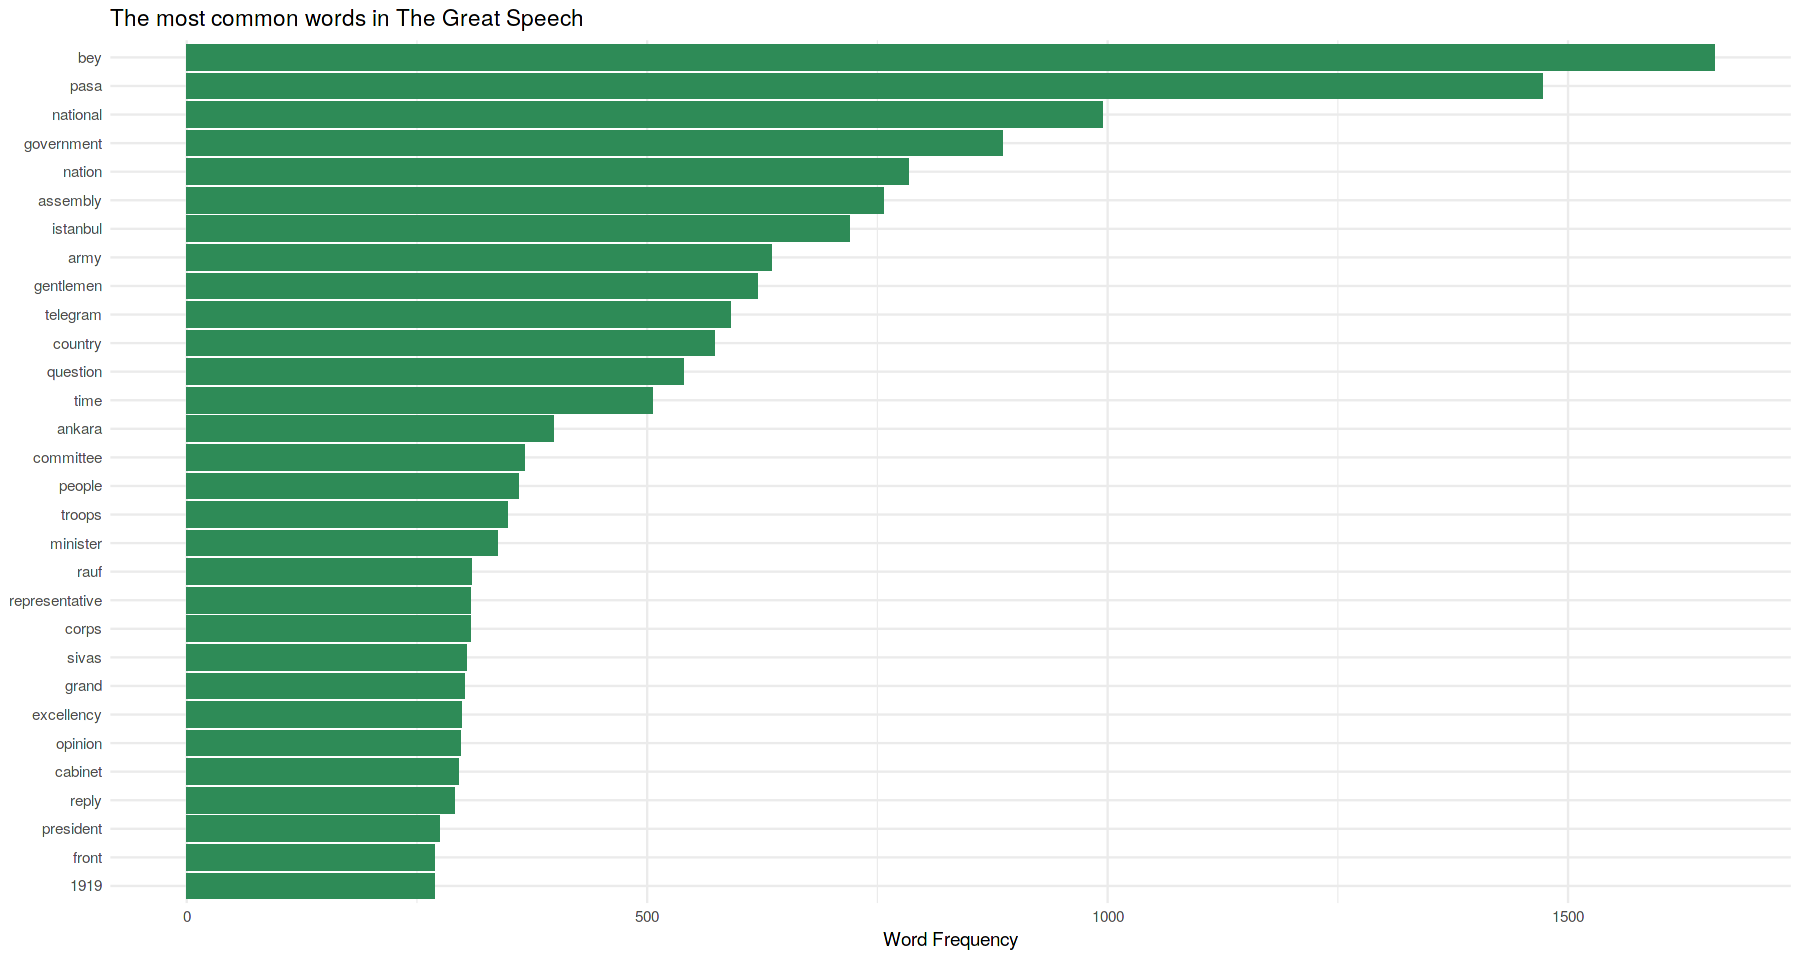

In [7]:
options(repr.plot.width = 15, repr.plot.height = 8)

tidy_nutuk %>% count(word, sort = TRUE) %>%
    head(30) %>% 
    ggplot(aes(reorder(word, n), n)) +
    geom_col(fill ="seagreen") +
    coord_flip()+
    theme_minimal()+
    labs(y = "Word Frequency",
         x = NULL,
         title = "The most common words in The Great Speech")

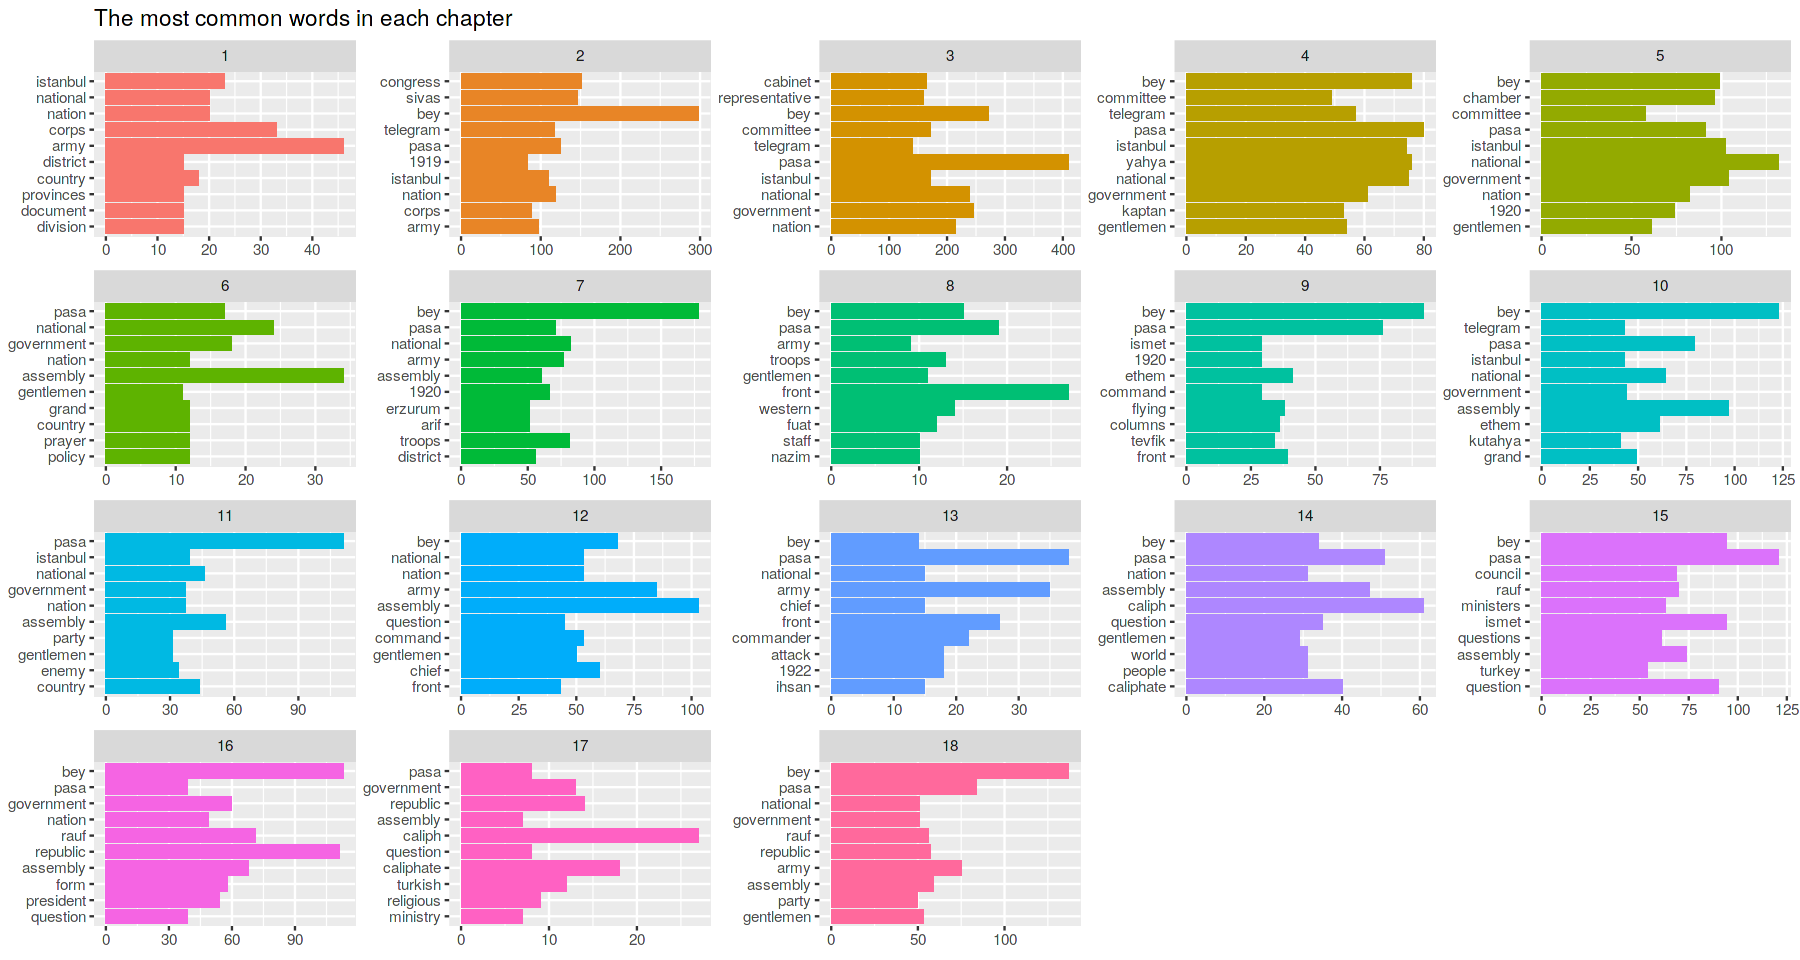

In [8]:
options(repr.plot.width = 15, repr.plot.height = 8)

tidy_nutuk %>% group_by(chapter) %>% 
    count(word, sort = TRUE) %>%
    do(head(., n = 10)) %>% 
    ggplot(aes(reorder(word, n), n, fill = chapter)) +
    geom_col(show.legend = FALSE) +
    coord_flip()+
    labs(y = NULL,
         x = NULL,
         title = "The most common words in each chapter")+
    facet_wrap(chapter~., scales = "free")

## 3.3. Sentiment Analysis

In [9]:
get_sentiments(lexicon = "bing") %>% head()

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative


Joining, by = "word"

Selecting by n



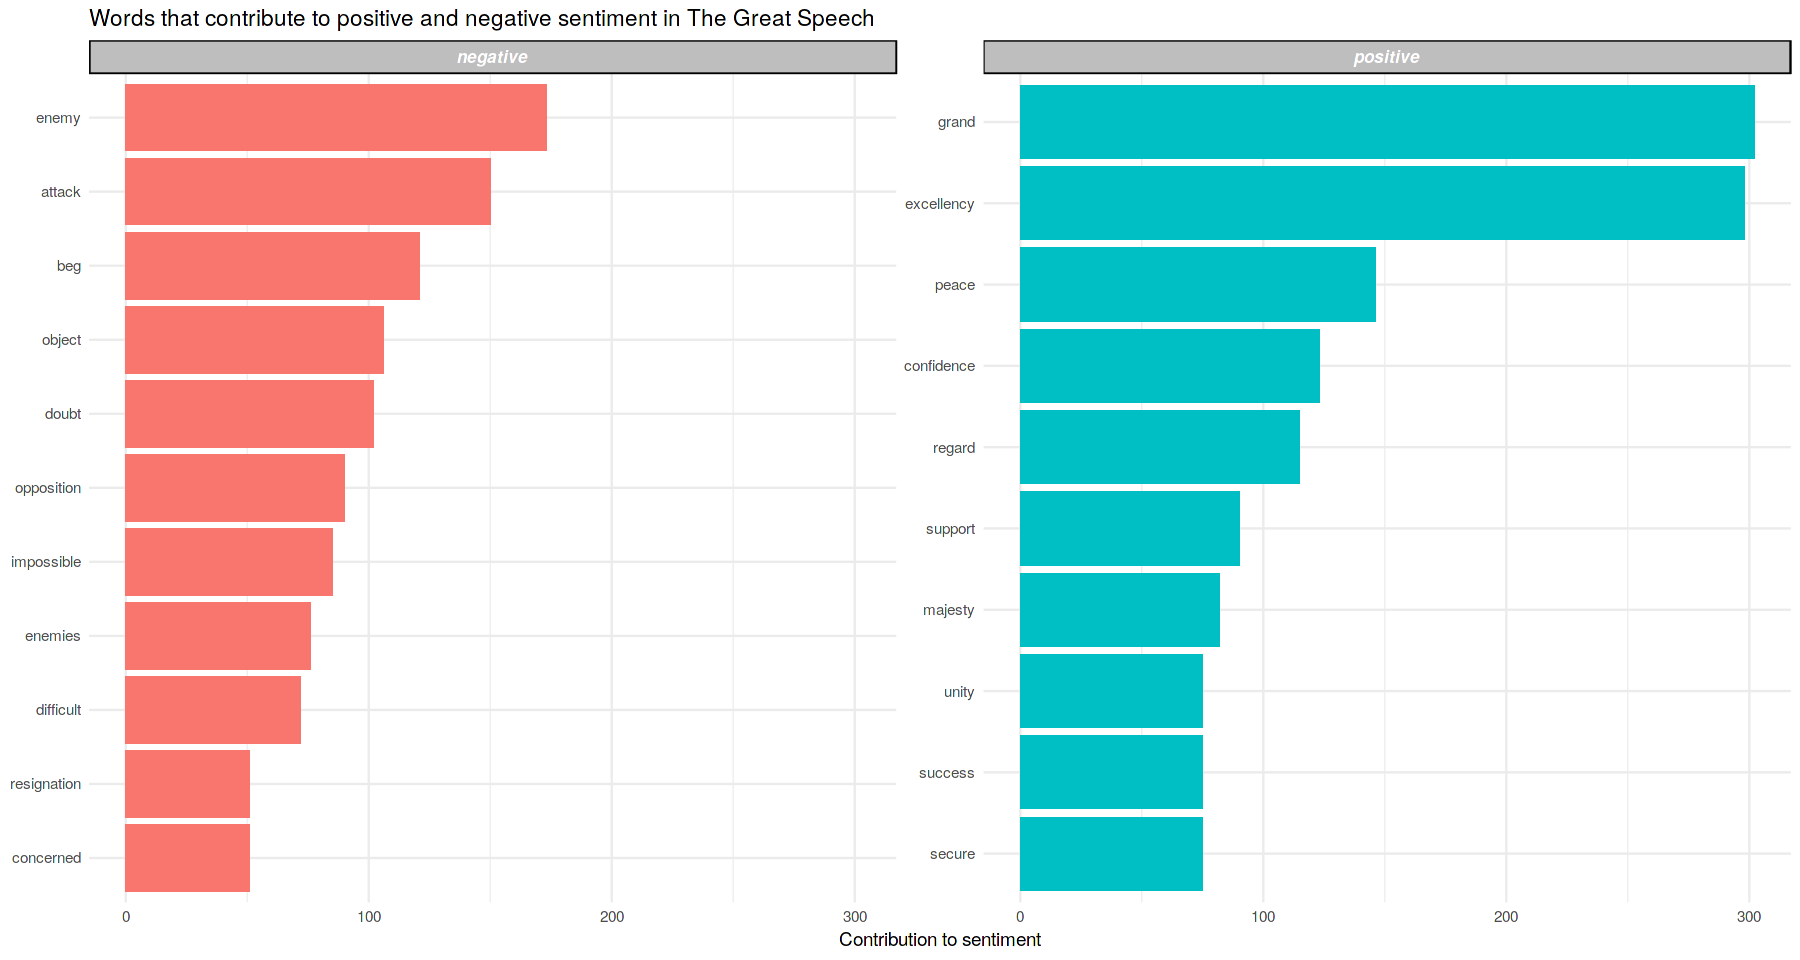

In [10]:
options(repr.plot.width = 15, repr.plot.height = 8)

tidy_nutuk %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup() %>% 
  group_by(sentiment) %>%
  top_n(10) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  theme_minimal()+
  theme(strip.background =element_rect(fill="gray"),
        strip.text.x = element_text(size = 10, colour = "white",face = "bold.italic"))+
  labs(y = "Contribution to sentiment",
       x = NULL,
       title = "Words that contribute to positive and negative sentiment in The Great Speech") +
  coord_flip()

## 3.4. Wordcloud

Joining, by = "word"



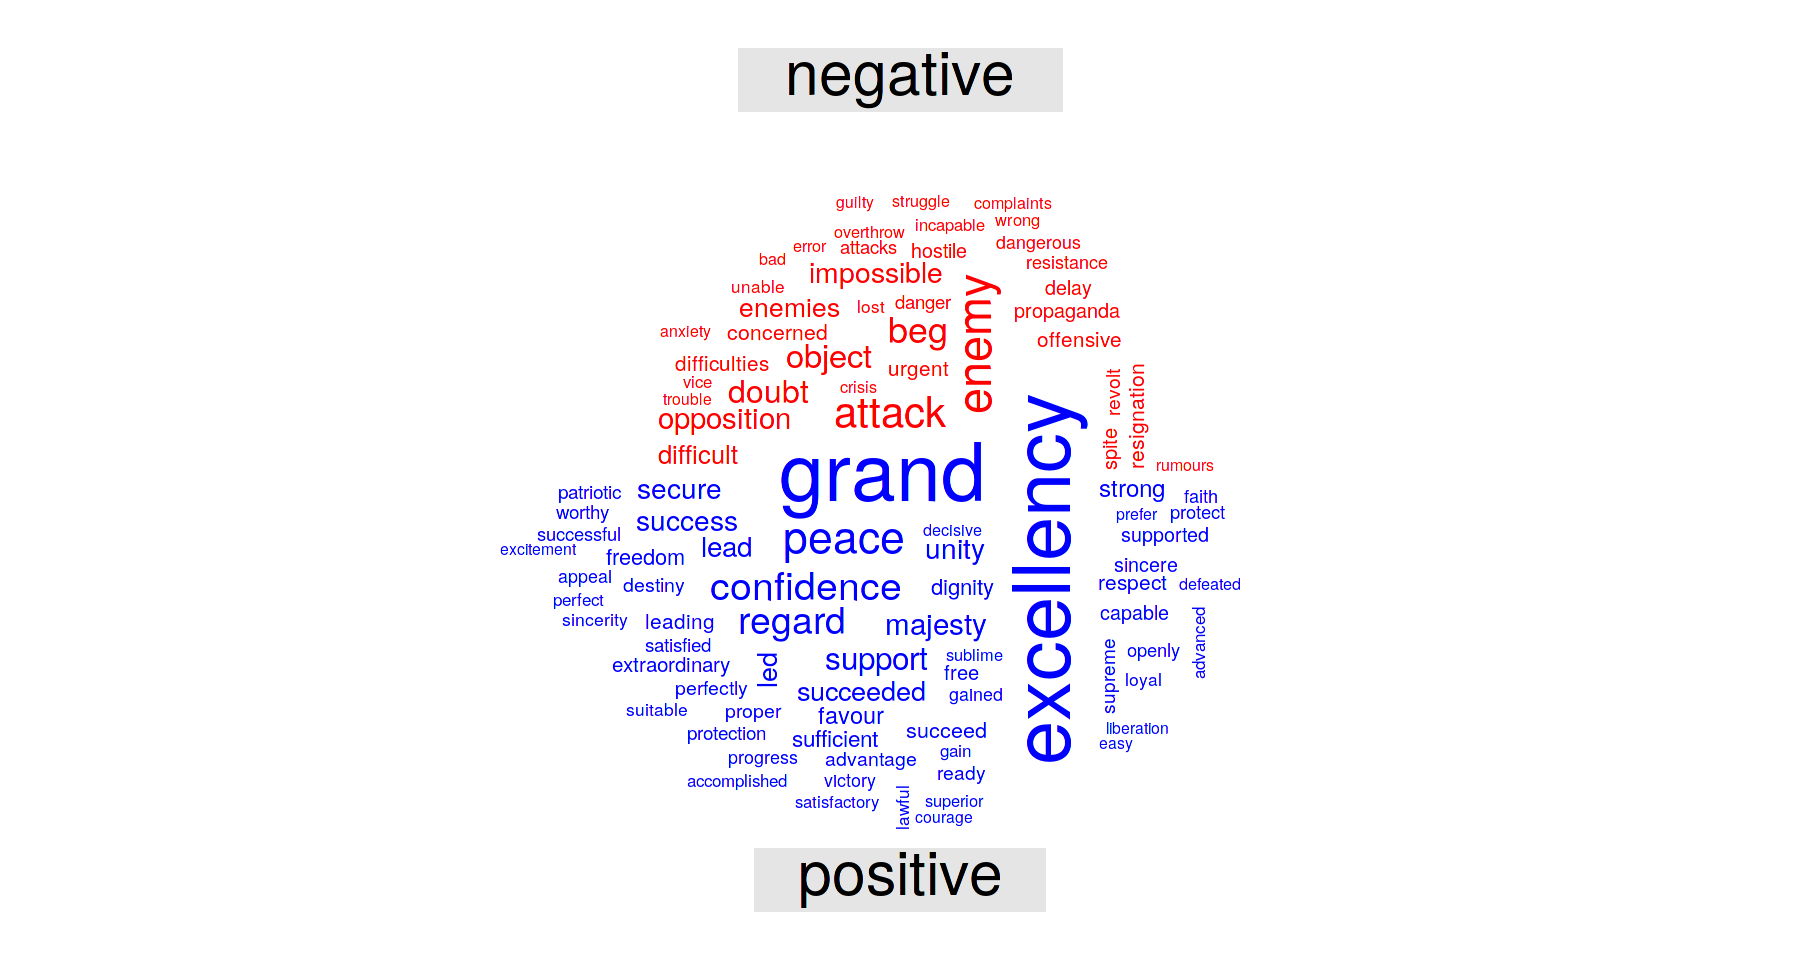

In [11]:
options(repr.plot.width = 15, repr.plot.height = 8)

tidy_nutuk %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("red", "blue"),
                   max.words = 100)

## 3.5. Countries

**Peace at home, peace in the world! - Mustafa Kemal Atatürk**

![](https://i.ytimg.com/vi/HZdDS9518rc/hqdefault.jpg)

In [12]:
years <- bind_rows( 
  # 1919
  year_1919 %>% rename(THE.GREAT.SPEECH = THE.GREAT.SPEECH.1919) %>% 
  mutate(year = "1919",
         linenumber = row_number(),
         chapter = cumsum(grepl("CHAPTER-", THE.GREAT.SPEECH))) %>%
  ungroup(),
  # 1920
  year_1920 %>% rename(THE.GREAT.SPEECH = THE.GREAT.SPEECH.1920) %>% 
  mutate(year = "1920",
         linenumber = row_number(),
         chapter = cumsum(grepl("CHAPTER-", THE.GREAT.SPEECH))) %>%
  ungroup(),
  # 1921
  year_1921 %>% rename(THE.GREAT.SPEECH = THE.GREAT.SPEECH.1921) %>% 
  mutate(year = "1921",
         linenumber = row_number(),
         chapter = cumsum(grepl("CHAPTER-", THE.GREAT.SPEECH))) %>%
  ungroup(),
  # 1922
  year_1922 %>% rename(THE.GREAT.SPEECH = THE.GREAT.SPEECH.1922) %>% 
  mutate(year = "1922",
         linenumber = row_number(),
         chapter = cumsum(grepl("CHAPTER-", THE.GREAT.SPEECH))) %>%
  ungroup(),
  # 1923
  year_1923 %>% rename(THE.GREAT.SPEECH = THE.GREAT.SPEECH.1923) %>% 
  mutate(year = "1923",
         linenumber = row_number(),
         chapter = cumsum(grepl("CHAPTER-", THE.GREAT.SPEECH))) %>%
  ungroup(),
  # 1924
  year_1924 %>% rename(THE.GREAT.SPEECH = THE.GREAT.SPEECH.1924) %>% 
  mutate(year = "1924",
         linenumber = row_number(),
         chapter = cumsum(grepl("CHAPTER-", THE.GREAT.SPEECH))) %>%
  ungroup(), 
  # 1925
  year_1925 %>% rename(THE.GREAT.SPEECH = THE.GREAT.SPEECH.1925) %>% 
  mutate(year = "1925",
         linenumber = row_number(),
         chapter = cumsum(grepl("CHAPTER-", THE.GREAT.SPEECH))) %>%
  ungroup()
  
) 

In [13]:
years_tidy <- years %>% 
  unnest_tokens(word, THE.GREAT.SPEECH) %>% 
  group_by(year) %>% 
  count(word) %>% 
  anti_join(stop_words) %>% 
  rename(term = word,
         document= year,
         count = n) 

Joining, by = "word"



**"Unless a nation’s life faces peril, war is murder." - Mustafa Kemal Atatürk**

![](https://i.makeagif.com/media/9-21-2015/tY0U8g.gif)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



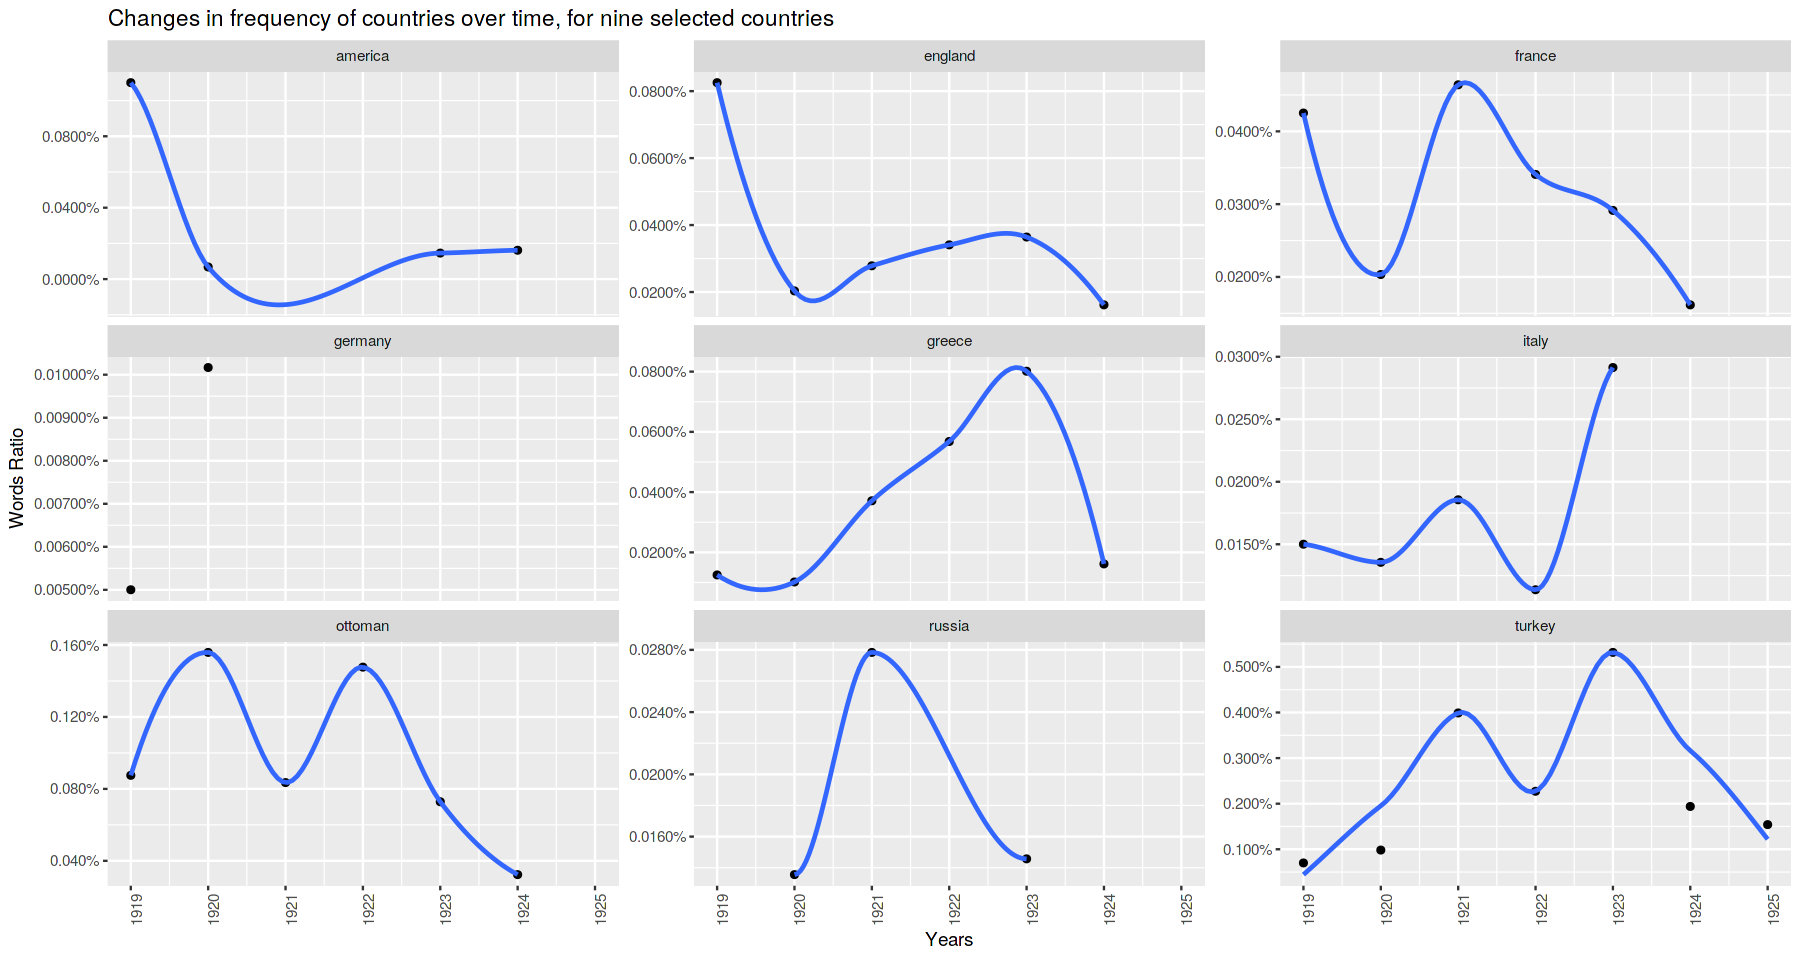

In [14]:
options(repr.plot.width = 15, repr.plot.height = 8)

plt <- years_tidy %>%  
  group_by(document) %>%
  mutate(year_total = sum(count)) %>% 
  filter(term %in% c("america", "england", "france", "germany", "greece", "italy", "ottoman","russia", "turkey")) %>%
  ggplot(aes(as.numeric(document), count / year_total)) +
  geom_point() +
  geom_smooth(se = FALSE) +
  facet_wrap(~ term, scales = "free_y") +
  scale_y_continuous(labels = scales::percent_format()) +
  ylab("Words Ratio")+
  xlab("Years")+
  labs(title = "Changes in frequency of countries over time, for nine selected countries")+
  scale_x_continuous(breaks=c(1919:1925), labels=c(1919:1925),limits=c(1919,1925))+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

suppressWarnings(print(plt))

**Victory is for those who can say “Victory is mine”. Success is for those who can begin saying “I will succeed.” and say “I have succeeded.” in the end. - Mustafa Kemal Atatürk**

![](https://media1.tenor.com/images/9bc96af34563931baaa6e3f071e4fc31/tenor.gif?itemid=12248775)

**To see me does not necessarily mean to see my face. To understand my thoughts, my feelings is to have seen me. - Mustafa Kemal Atatürk**

![](http://www.kocaelihaberdunyasi.com/img/haber/ataturk-un-naasi-yikandi_489.jpg)

Mustafa Kemal Atatürk's videos

https://www.youtube.com/watch?v=7baI2efVI_0

https://www.youtube.com/watch?v=pNIC10vmbsE